In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
path = "churn.csv"

In [39]:
churn = pd.read_csv(path)
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [40]:
churn = churn.rename(columns=str.lower)
churn = churn.drop(['paperlessbilling','onlinesecurity','deviceprotection','customerid','onlinebackup'], axis=1)
churn

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,techsupport,streamingtv,streamingmovies,contract,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,Yes,One year,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes


In [41]:
churn.loc[churn.churn == 'No', 'churn'] = 0
churn.loc[churn.churn == 'Yes', 'churn'] = 1
churn.loc[churn.multiplelines == 'No phone service', 'multiplelines'] = 'No'
churn.loc[churn.techsupport == 'No internet service', 'techsupport'] = 'No'
churn.loc[churn.streamingtv == 'No internet service', 'streamingtv'] = 'No'
churn.loc[churn.streamingmovies == 'No internet service', 'streamingmovies'] = 'No'
churn = churn.astype({"churn": 'int64'})  

In [42]:
churn.insert(0, 'id',range(1,7044))
churn

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,techsupport,streamingtv,streamingmovies,contract,paymentmethod,monthlycharges,totalcharges,churn
0,1,Female,0,Yes,No,1,No,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,2,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,0
2,3,Male,0,No,No,2,Yes,No,DSL,No,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,4,Male,0,No,No,45,No,No,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,0
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,Yes,Yes,One year,Mailed check,84.80,1990.5,0
7039,7040,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,0
7040,7041,Female,0,Yes,Yes,11,No,No,DSL,No,No,No,Month-to-month,Electronic check,29.60,346.45,0
7041,7042,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,1


In [43]:
churn.loc[(churn['totalcharges'] == " ")] = 0

In [44]:
churn.totalcharges.value_counts()

0          11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
4824.45     1
244.45      1
1505.9      1
7842.3      1
7657.4      1
Name: totalcharges, Length: 6531, dtype: int64

In [45]:
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'])

In [46]:
churn.isnull().sum()

id                 0
gender             0
seniorcitizen      0
partner            0
dependents         0
tenure             0
phoneservice       0
multiplelines      0
internetservice    0
techsupport        0
streamingtv        0
streamingmovies    0
contract           0
paymentmethod      0
monthlycharges     0
totalcharges       0
churn              0
dtype: int64

In [47]:
churn.loc[churn.partner == 'No', 'partner'] = 0
churn.loc[churn.partner == 'Yes', 'partner'] = 1
churn = churn.astype({"partner": 'int64'})  
churn.loc[churn.dependents == 'No', 'dependents'] = 0
churn.loc[churn.dependents == 'Yes', 'dependents'] = 1
churn = churn.astype({"dependents": 'int64'})  
churn.loc[churn.phoneservice == 'No', 'phoneservice'] = 0
churn.loc[churn.phoneservice == 'Yes', 'phoneservice'] = 1
churn = churn.astype({"phoneservice": 'int64'})  
churn.loc[churn.multiplelines == 'No', 'multiplelines'] = 0
churn.loc[churn.multiplelines == 'Yes', 'multiplelines'] = 1
churn = churn.astype({"multiplelines": 'int64'})  
churn.loc[churn.techsupport == 'No', 'techsupport'] = 0
churn.loc[churn.techsupport == 'Yes', 'techsupport'] = 1
churn = churn.astype({"techsupport": 'int64'})  
churn.loc[churn.streamingtv == 'No', 'streamingtv'] = 0
churn.loc[churn.streamingtv == 'Yes', 'streamingtv'] = 1
churn = churn.astype({"streamingtv": 'int64'})  
churn.loc[churn.streamingmovies == 'No', 'streamingmovies'] = 0
churn.loc[churn.streamingmovies == 'Yes', 'streamingmovies'] = 1
churn = churn.astype({"streamingmovies": 'int64'})  
churn


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,techsupport,streamingtv,streamingmovies,contract,paymentmethod,monthlycharges,totalcharges,churn
0,1,Female,0,1,0,1,0,0,DSL,0,0,0,Month-to-month,Electronic check,29.85,29.85,0
1,2,Male,0,0,0,34,1,0,DSL,0,0,0,One year,Mailed check,56.95,1889.50,0
2,3,Male,0,0,0,2,1,0,DSL,0,0,0,Month-to-month,Mailed check,53.85,108.15,1
3,4,Male,0,0,0,45,0,0,DSL,1,0,0,One year,Bank transfer (automatic),42.30,1840.75,0
4,5,Female,0,0,0,2,1,0,Fiber optic,0,0,0,Month-to-month,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,Male,0,1,1,24,1,1,DSL,1,1,1,One year,Mailed check,84.80,1990.50,0
7039,7040,Female,0,1,1,72,1,1,Fiber optic,0,1,1,One year,Credit card (automatic),103.20,7362.90,0
7040,7041,Female,0,1,1,11,0,0,DSL,0,0,0,Month-to-month,Electronic check,29.60,346.45,0
7041,7042,Male,1,1,0,4,1,1,Fiber optic,0,0,0,Month-to-month,Mailed check,74.40,306.60,1


In [48]:
churn=pd.get_dummies(churn)

In [49]:
churn

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_No,contract_0,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_0,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,0,34,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,0,0,0,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4,0,0,0,45,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,0,0,0,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,1,1,24,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
7039,7040,0,1,1,72,1,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0
7040,7041,0,1,1,11,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7041,7042,1,1,0,4,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
churn = churn.drop(['contract_0','gender_0','internetservice_0','paymentmethod_0'], axis=1)

In [51]:
churn=churn.astype(float)

In [52]:
churn.dtypes

id                                         float64
seniorcitizen                              float64
partner                                    float64
dependents                                 float64
tenure                                     float64
phoneservice                               float64
multiplelines                              float64
techsupport                                float64
streamingtv                                float64
streamingmovies                            float64
monthlycharges                             float64
totalcharges                               float64
churn                                      float64
gender_Female                              float64
gender_Male                                float64
internetservice_DSL                        float64
internetservice_Fiber optic                float64
internetservice_No                         float64
contract_Month-to-month                    float64
contract_One year              

In [53]:
churn

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,7040.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,7041.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,7042.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


0.0    0.73463
1.0    0.26537
Name: churn, dtype: float64

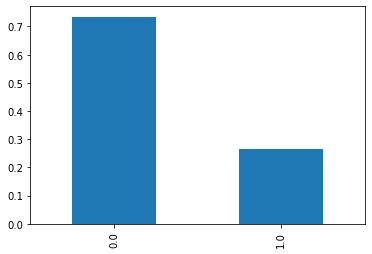

In [54]:
churn.churn.value_counts(normalize=True).plot(kind='bar');
churn.churn.value_counts(normalize=True)

In [55]:
churn.describe()

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3517.060486,0.162147,0.481755,0.298026,32.371149,0.901888,0.421269,0.289649,0.383785,0.387761,...,0.343036,0.439585,0.215817,0.550192,0.209002,0.239245,0.218941,0.215959,0.335794,0.227744
std,2036.002241,0.368612,0.499702,0.457424,24.559481,0.297487,0.493798,0.453632,0.486341,0.487274,...,0.474757,0.496372,0.411417,0.497510,0.406625,0.426653,0.413558,0.411515,0.472301,0.419406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1755.500000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3517.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5280.500000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7043.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Churn Correlations'}>

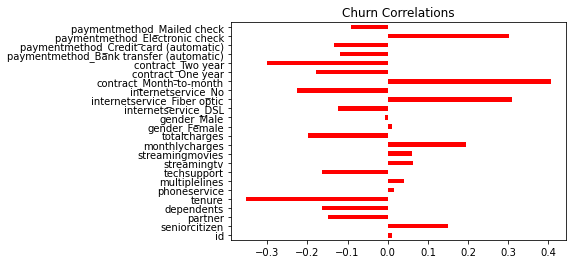

In [64]:
churn.corr()['churn'].drop('churn').plot(kind='barh',color="r",title = "Churn Correlations")

0.0    0.73463
1.0    0.26537
Name: churn, dtype: float64

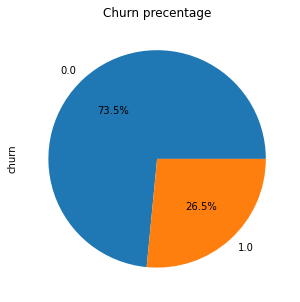

In [77]:
churn.churn.value_counts().plot(kind='pie',figsize=(5,5),title="Churn precentage",autopct='%1.1f%%');
churn.churn.value_counts(normalize=True)


In [136]:
churn['tenureScale'] = None
churn.loc[(churn['tenure'] < 7.),'tenureScale'] = '0-6'
churn.loc[(churn['tenure'] >=7.) &(churn['tenure'] < 21.),'tenureScale'] = '7-20'
churn.loc[(churn['tenure'] >=21.) &(churn['tenure'] < 55.),'tenureScale'] = '21-54'
churn.loc[(churn['tenure'] >=55.) ,'tenureScale'] = '55+'

In [137]:
churn

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenureScale
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0-6
1,2.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21-54
2,3.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0-6
3,4.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,21-54
4,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21-54
7039,7040.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55+
7040,7041.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7-20
7041,7042.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0-6


In [148]:
churn.groupby('tenureScale').agg({'churn':['count',sum,'mean']}).sort_values(['tenureScale'],ascending=True)


churn                 
            count    sum      mean
tenureScale                       
0-6          1481  784.0  0.529372
21-54        2346  473.0  0.201620
55+          1819  145.0  0.079714
7-20         1397  467.0  0.334288

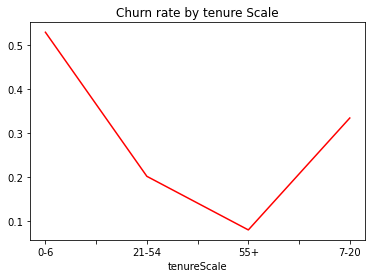

In [150]:
x = churn.groupby('tenureScale').churn.mean()
x.plot(kind='line', color="r", title = "Churn rate by tenure Scale");

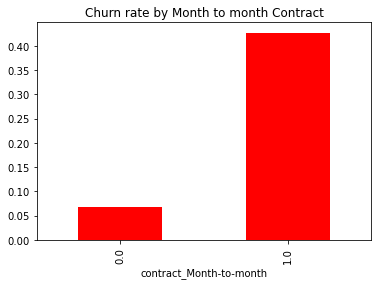

In [157]:
x1 = churn.groupby("contract_Month-to-month").churn.mean()
x1.plot(kind='bar', color="r", title = "Churn rate by Month to month Contract");

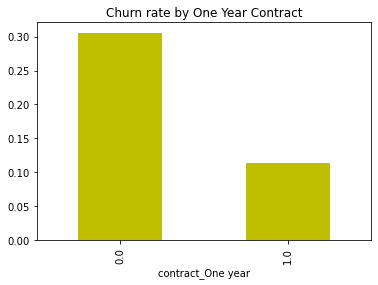

In [164]:
x2 = churn.groupby("contract_One year").churn.mean()
x2.plot(kind='bar', color="y", title = "Churn rate by One Year Contract");

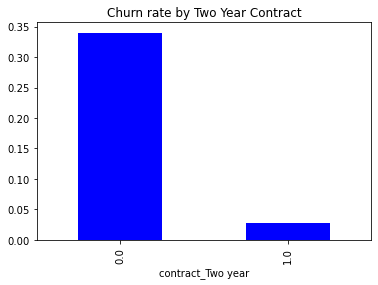

In [163]:
x3 = churn.groupby("contract_Two year").churn.mean()
x3.plot(kind='bar', color="b", title = "Churn rate by Two Year Contract");

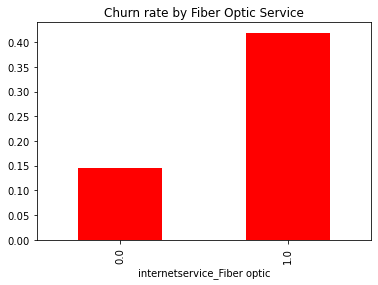

In [165]:
y1 = churn.groupby("internetservice_Fiber optic").churn.mean()
y1.plot(kind='bar', color="r", title = "Churn rate by Fiber Optic Service");

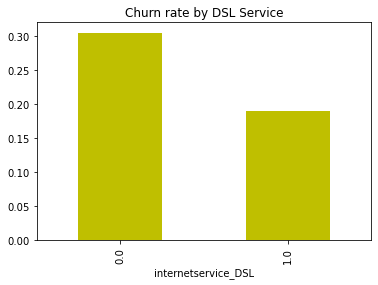

In [167]:
y2 = churn.groupby("internetservice_DSL").churn.mean()
y2.plot(kind='bar', color="y", title = "Churn rate by DSL Service");

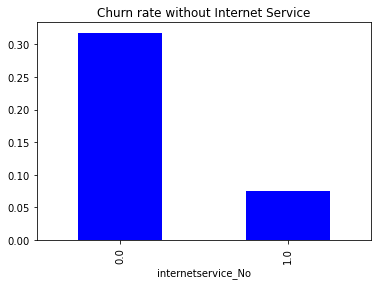

In [169]:
y3 = churn.groupby("internetservice_No").churn.mean()
y3.plot(kind='bar', color="b", title = "Churn rate without Internet Service");

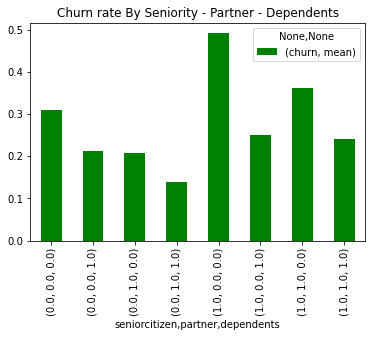

In [194]:
grouped_multiple = churn.groupby(['seniorcitizen', 'partner','dependents']).agg({'churn': ['mean']})
grouped_multiple.plot(kind='bar', color="g", title = "Churn rate By Seniority - Partner - Dependents");


In [206]:
grouped_multiple = churn.groupby(['dependents']).agg({'churn': ['mean']})
grouped_multiple2 = churn.groupby(['seniorcitizen']).agg({'churn': ['mean']})
grouped_multiple3 = churn.groupby(['partner']).agg({'churn': ['mean']})


In [209]:
grouped_multiple

,churn
,mean
partner,
0.0,0.328767
1.0,0.197171


In [210]:
grouped_multiple2

,churn
,mean
seniorcitizen,
0.0,0.236062
1.0,0.416813


In [211]:
grouped_multiple3

,churn
,mean
partner,
0.0,0.328767
1.0,0.197171


In [78]:
from sklearn.model_selection import train_test_split
test_size = 2000
train, test = train_test_split(churn, test_size=test_size, random_state=0, shuffle=True)
label = 'churn'
x_train = train.drop(label, axis=1)
y_train = train[label]
x_test, y_test = test.drop(label, axis=1), test[label]


In [81]:
train

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6041,6042.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2175,2176.0,0.0,0.0,0.0,30.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
575,576.0,0.0,1.0,0.0,61.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2615,2616.0,0.0,0.0,0.0,72.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4932.0,0.0,1.0,0.0,15.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3264,3265.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1653,1654.0,0.0,1.0,0.0,58.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2607,2608.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
test

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2200,2201.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,4628.0,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3225,3226.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2828,2829.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,3769.0,0.0,1.0,0.0,55.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,6794.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6642,6643.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1511,1512.0,0.0,1.0,1.0,67.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5789,5790.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [83]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5043, 24), (5043,), (2000, 24), (2000,))

In [84]:
x_train

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6041,6042.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2175,2176.0,0.0,0.0,0.0,30.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
575,576.0,0.0,1.0,0.0,61.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2615,2616.0,0.0,0.0,0.0,72.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4932.0,0.0,1.0,0.0,15.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3264,3265.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1653,1654.0,0.0,1.0,0.0,58.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2607,2608.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
x_test

,id,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,techsupport,streamingtv,streamingmovies,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2200,2201.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,4628.0,0.0,0.0,0.0,60.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3225,3226.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2828,2829.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,3769.0,0.0,1.0,0.0,55.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,6794.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6642,6643.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1511,1512.0,0.0,1.0,1.0,67.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5789,5790.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [118]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'survived_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

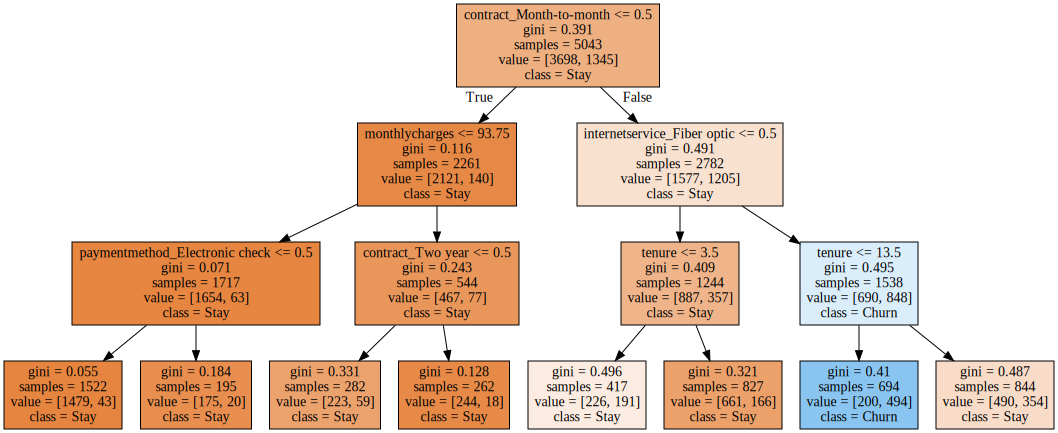

In [119]:
# Plotting the decision tree
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
plot_tree(clf, x_train.columns, ['Stay', 'Churn'])

In [91]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [92]:
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7845

In [102]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv


In [96]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv

test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

In [117]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7795

In [106]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7125

In [107]:
# Decision Tree -- max_depth = 3 (like before)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7845

In [108]:
# Decision Tree -- max_depth = 2

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.757

In [113]:
# Decision Tree -- max_depth = 5

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7905

In [110]:
# Decision Tree -- max_depth = 99

clf = DecisionTreeClassifier(max_depth=99)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7295

## max_depth=5 --> look like the best one









# Overfitting in Random Forest

In [122]:
# Random Forest -- n_estimators = 100 & max_depth = 3 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7795

In [230]:
# Random Forest -- n_estimators = 100 & max_depth = 5 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.793

In [231]:
# Random Forest -- n_estimators = 100 & max_depth = 9 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7975

In [232]:
# Random Forest -- n_estimators = 100 & max_depth = 15 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7855

## looks like  "n_estimators" should be about a 200 (n_estimators = 200 ~ 78.25% accuracy)
## Let's "play" with  "max_depth"
<br>

In [126]:
# Random Forest -- n_estimators = 200 & max_depth = 5

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7925

In [131]:
# Random Forest -- n_estimators = 200 & max_depth = 7

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7975

In [132]:
# Random Forest -- n_estimators = 200 & max_depth = 10

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.797

In [133]:
# Random Forest -- n_estimators = 200 & max_depth = 20

model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7885

In [134]:
# Random Forest -- n_estimators = 200 & max_depth = 30

model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.789

## We've improved our model
## "n_estimators=200" & "max_depth=7" is a pretty good fit ~ 79.75%
<br>

In [215]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7125

In [217]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7385

In [229]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.75